# Extra exercise 
Create a model to clasify face images with a random forest model.

load the images

In [1]:
#libraries
import sys
sys.path.append("code")
from haar import *
import os
from skimage import io
import numpy as np

#import the images
base_dir = "faces/"
dir_positives = base_dir+"positives"
dir_negatives = base_dir+"negatives"
positive_filenames = os.listdir(dir_positives)
negative_filenames = os.listdir(dir_negatives)

pos_imgs = []
neg_imgs = []

for i in positive_filenames:
    img = io.imread(dir_positives+"/"+i).astype(int)
    pos_imgs.append(img)

for i in negative_filenames:
    img = io.imread(dir_negatives+"/"+i).astype(int)
    neg_imgs.append(img)

In [2]:
print ("loaded", len(pos_imgs), "positive images and", len(neg_imgs), "negative images")

loaded 117 positive images and 94 negative images


Set the harr features

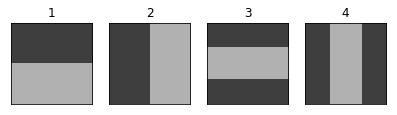

In [3]:
# Set the haar features
haar_1 = [ {"op": "add", "topleft_row_rel": 0.0, "topleft_col_rel": 0.0, "height_rel": 0.5, "width_rel": 1.0},
           {"op": "sub", "topleft_row_rel": 0.5, "topleft_col_rel": 0.0, "height_rel": 0.5, "width_rel": 1.0}]

haar_2 = [ {"op": "add", "topleft_row_rel": 0.0, "topleft_col_rel": 0.0, "height_rel": 1.0, "width_rel": 0.5},
           {"op": "sub", "topleft_row_rel": 0.0, "topleft_col_rel": 0.5, "height_rel": 1.0, "width_rel": 0.5}]

haar_3 = [ {"op": "add", "topleft_row_rel": 0.0,   "topleft_col_rel": 0.0, "height_rel": 0.3, "width_rel": 1.0},
           {"op": "add", "topleft_row_rel": 0.7,   "topleft_col_rel": 0.0, "height_rel": 0.3, "width_rel": 1.0},
           {"op": "sub", "topleft_row_rel": 0.3,   "topleft_col_rel": 0.0, "height_rel": 0.4, "width_rel": 1.0}]

haar_4 = [ {"op": "add", "topleft_row_rel": 0.0, "topleft_col_rel": 0.0, "height_rel": 1.0, "width_rel": 0.3},
           {"op": "add", "topleft_row_rel": 0.0, "topleft_col_rel": 0.7, "height_rel": 1.0, "width_rel": 0.3},
           {"op": "sub", "topleft_row_rel": 0.0, "topleft_col_rel": 0.3, "height_rel": 1.0, "width_rel": 0.4}]

show_haar_features([haar_1, haar_2, haar_3, haar_4])
haar_features = [ haar_1, haar_2, haar_3, haar_4 ]

put the haar data

In [4]:
def make_haar_dataset_for_faces(haar_features, positive_images, negative_images, N):
    datos     = []
    etiquetas = []
    # positive
    i =0
    while i<len(positive_images):
        datos.append(get_haar_features(haar_features, positive_images[i], get_integral(positive_images[i]), nb_scales=N, nb_shifts=N))
        etiquetas.append(1)
        i+=1
    j = i
    r = j+len(negative_images)
    while j<len(negative_images):
        datos.append(get_haar_features(haar_features, negative_images[j], get_integral(negative_images[j]), nb_scales=N, nb_shifts=N))
        etiquetas.append(0)
        j+=1
    datos = np.array(datos)
    etiquetas = np.array(etiquetas)
    return datos, etiquetas

Look the result

In [5]:
d,c = make_haar_dataset_for_faces(haar_features, pos_imgs, neg_imgs, 6)
print (d.shape, c.shape)

(117, 400) (117,)


In [6]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier

est = RandomForestClassifier(n_estimators=50)
sc = cross_val_score(est, d, c, cv=10)
print(np.mean(sc), np.std(sc))

/home/lotalorafox/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


1.0 0.0
